<a href="https://colab.research.google.com/github/Inna949Festchuk/codespaces-jupyter/blob/main/download_sentinel_2_data_and_calculate_ndvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This notebook illustrates how to search and download Sentinel-2 images and calculate the Normalized Difference Vegetation Index (NDVI) using [Remotior Sensus
](https://fromgistors.blogspot.com/p/remotior-sensus.html).

NDVI is one of the main spectral indices used in remote sensing, which is defined as:

$\textrm{NDVI}=\frac{\textrm{Near-Infrared - Red}}{\textrm{Near-Infrared + Red}}$



> **Remotior Sensus** *(which is Latin for “a more remote sense”) is a Python package that allows for the processing of remote sensing images and GIS data*.
*Other tutorials are available [here](https://remotior-sensus.readthedocs.io/en/latest/basic_tutorials.html).*



# Install Remotior Sensus

First, we install Remotior Sensus using Pip.



>*The dependencies (i.e. NumPy, SciPy, GDAL; optionally scikit-learn and PyTorch) are already [installed](https://remotior-sensus.readthedocs.io/en/latest/installation.html).*

In [1]:
!pip install remotior_sensus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.4/334.4 kB 5.4 MB/s eta 0:00:00


# Start a Remotior Sensus' Session
Import Remotior Sensus and **start a Remotior Sensus’** [**session**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.core.session.html), defining the number of processes (`n_processes`) and RAM (`available_ram`) available in the system.

During the start of a session, a temporary directory is created to store temporary files, which is automatically removed after closing the session. Also, subprocesses are started for parallel processing.

It is advisable to enter a high amount of RAM, but not the maximum available RAM (e.g. leave at least 2 GB reserved to the system).



>*For further information about sessions, please read the [User Manual](https://remotior-sensus.readthedocs.io).*

In [2]:
import remotior_sensus
rs = remotior_sensus.Session(n_processes=2, available_ram=10240)

# Search and Download Sentinel-2 Images

Remotior Sensus allows for searching and downloading Sentinel-2 images directly.


## Perform a Query

We can use the function [**download_products.search**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.tools.download_products.html#remotior_sensus.tools.download_products.search) to **query the Sentinel-2 database** and retrieve a table of available images.

In this case we are going to search images that match the **tile name** (using the argument `name_filter` level 2A images are retrieved). Alternatively, we could use the argument `coordinate_list=[left, top, right, bottom]` to search an area by WGS84 coordinates.

We set a period range (`date_from` and `date_to`), and a threshold for **maximum cloud cover** (`max_cloud_cover`).



> This tool performs the query from Microsoft Planetary Computer data catalog https://planetarycomputer.microsoft.com.

In [3]:
query_result = rs.download_products.search(
    product='Sentinel-2_MPC', name_filter='T33TTG',
    date_from='2022-07-01', date_to='2022-07-30',
    max_cloud_cover=10
)

 search [100%] [elapsed 0min07sec]: ⬤

## Query Results
The `query_result` is an object [**OutputManager**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.core.output_manager.html) including a product table (NumPy recarray) that we can retrive with the attribute `extra['product_table']`.




In [4]:
product_table = query_result.extra['product_table']
print(product_table)

[('Sentinel-2_MPC', 'L2A_T33TTG_A027790_20220702T101516', 'S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011', '2022-07-02', 0, '33TTG', 'None', 41.40772619, 11.35495423, 42.42347082, 12.46112322, 'sentinel-2-l2a', 'None', 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png', 'S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011', 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011')
 ('Sentinel-2_MPC', 'L2A_T33TTG_A027790_20220702T101516', 'S2B_MSIL2A_20220702T100559_R022_T33TTG_20240701T053734', '2022-07-02', 0, '33TTG', 'None', 41.4077262 , 11.3549542 , 42.4234706 , 12.4611147 , 'sentinel-2-l2a', 'None', 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20220702T

We can have a look at the **table fields**, which include information such as acquisition date, cloud cover, and a preview link. For instance, we can read the records of the first image in the table.

In [5]:
print(product_table[0].pprint())

         product: Sentinel-2_MPC
           image: L2A_T33TTG_A027790_20220702T101516
      product_id: S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011
acquisition_date: 2022-07-02
     cloud_cover: 0
       zone_path: 33TTG
             row: None
         min_lat: 41.40772619
         min_lon: 11.35495423
         max_lat: 42.42347082
         max_lon: 12.46112322
      collection: sentinel-2-l2a
            size: 1
         preview: https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png
             uid: S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011
         ref_url: https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011


An image preview is available, which we can open (using Matplotlib).

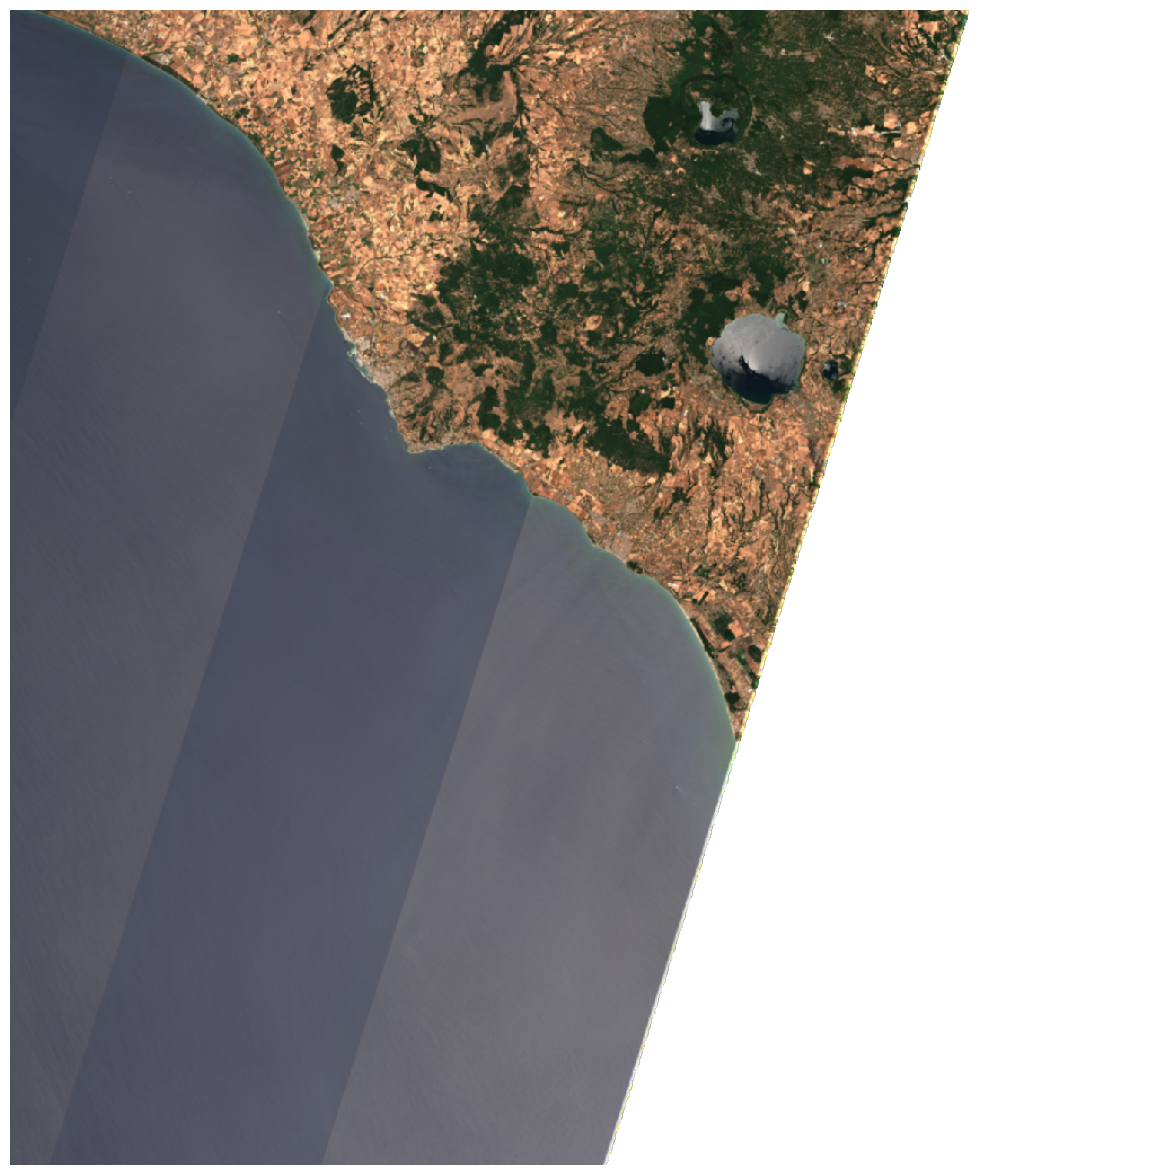

In [6]:
#@title Figure
import requests
from PIL import Image
import matplotlib.pyplot as plt
request = requests.get(product_table[0].preview)
file = open('/tmp/preview.jp2', 'wb')
file.write(request.content)
file.close()
preview = Image.open('/tmp/preview.jp2')
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(preview)

## Product Filtering

Now we can download all the images in the table, or select a subset of images by **filtering** the `product_table` on any of the available fields.

For instance, it is possible to select an image by name (field `image`), using the methods of NumPy recarrays.

In [7]:
image_table = product_table[
    product_table['image'] == 'L2A_T33TTG_A037013_20220724T100037'
    ]

print(image_table)

[('Sentinel-2_MPC', 'L2A_T33TTG_A037013_20220724T100037', 'S2A_MSIL2A_20220724T100041_R122_T33TTG_20220726T072915', '2022-07-24', 2, '33TTG', 'None', 41.40772619, 11.35495423, 42.42936087, 12.72303343, 'sentinel-2-l2a', 'None', 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2A_MSIL2A_20220724T100041_R122_T33TTG_20220726T072915&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png', 'S2A_MSIL2A_20220724T100041_R122_T33TTG_20220726T072915', 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20220724T100041_R122_T33TTG_20220726T072915')
 ('Sentinel-2_MPC', 'L2A_T33TTG_A037013_20220724T100037', 'S2A_MSIL2A_20220724T100041_R122_T33TTG_20240716T191956', '2022-07-24', 2, '33TTG', 'None', 41.4077262 , 11.3549542 , 42.4293609 , 12.7230334 , 'sentinel-2-l2a', 'None', 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2A_MSIL2A_20220724T

It is possible to **filter by defining a condition**.
In particular, we exclude the images without a preview link.

In [8]:
filtered_table = product_table[
    product_table['preview'] != 'None'
    ]

print(filtered_table)

[('Sentinel-2_MPC', 'L2A_T33TTG_A027790_20220702T101516', 'S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011', '2022-07-02', 0, '33TTG', 'None', 41.40772619, 11.35495423, 42.42347082, 12.46112322, 'sentinel-2-l2a', 'None', 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png', 'S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011', 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2B_MSIL2A_20220702T100559_R022_T33TTG_20220702T234011')
 ('Sentinel-2_MPC', 'L2A_T33TTG_A027790_20220702T101516', 'S2B_MSIL2A_20220702T100559_R022_T33TTG_20240701T053734', '2022-07-02', 0, '33TTG', 'None', 41.4077262 , 11.3549542 , 42.4234706 , 12.4611147 , 'sentinel-2-l2a', 'None', 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20220702T

## Image Download

We define a working directory where to save the data of this tutorial.

In [9]:
working_directory = '/home/tutorial'

To download the images, we pass the `filterd_table` as `product_table` argument to the function [**download_products.download**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.tools.download_products.html#remotior_sensus.tools.download_products.download).


Considering that we are going to **calculate NDVI**, we download only **bands 4 and 8** for **red and near-infrared** respectively.
Bands are selected with the argument `band_list` which is a list of band names which for Sentinel-2 are:
*'01', '02', '03', '04', '05', '06', '07', '08', '8a', '09', '10', '11', '12'*.

We define an `output_directory` where downloaded files are saved.

In [ ]:
downloaded_images = rs.download_products.download(
    product_table=filtered_table,
    band_list=['04', '08'],
    output_path=working_directory + '/downloaded_images',
    )

 download products [ 59%] [elapsed 8min40sec] [remaining 5min57sec] downloading band 08 ⚙

During the download, a directory inside the `output_directory` was created for each downloaded image.

`downloaded_images` is an an object [**OutputManager**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.core.output_manager.html) that includes a list of created directories in the attribute `extra['directory_paths']`.

We define image_directories


In [ ]:
print(downloaded_images.extra['directory_paths'])

# Data Preprocessing
During the preprocessing, the images are converted from digital numbers to **decimal values of reflectance** (L2A images are already atmospherically corrected) also applying scale and offset factors which are usually provided in metadata.

The function [**preprocess_products.preprocess**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.tools.preprocess_products.html#remotior_sensus.tools.preprocess_products.preprocess) accepts a directory containing the image bands as `input_path` argument.

In this case, we **iterate the directories** of all the downloaded images.
All the bands are converted to reflectance and saved in an output directory, which we define `output_path=directory + '/preprocessed'`.

`nodata_value` allows for masking image NoData by value.

Defining a list `preprocessed_image_directories` is convenient to retrieve the directories of preprocessed images that we are going to use later.
The process can take a few minutes.

In [ ]:
preprocessed_image_directories = []
for directory in downloaded_images.extra['directory_paths']:
  preprocessed = rs.preprocess_products.preprocess(
      sensor='Sentinel-2',
      input_path=directory,
      output_path=directory + '/preprocessed',
      nodata_value=0
    )
  preprocessed_image_directories.append(directory + '/preprocessed')
  print('\n', directory + '/preprocessed')

# Data Processing

We are going to **calculate the NDVI for each image**, and then use all the NDVIs to calculate statistics such as average or maximum per pixel.

Remotior Sensus provides several ways to perform calculations using the tool [**band_calc**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.tools.band_calc.html) which allows for performing calculations based on an `expression_string`.

## Single Calculation

For educational purpose, we are going to calculate NDVI for a single image.
First, we get the path of the last image that was preprocessed.

In [ ]:
red_path = preprocessed.paths[0]
nir_path = preprocessed.paths[1]

print(red_path)
print(nir_path)

Using `band_calc`, it is possible to create an expression defining the `input_raster_list` as a list where each element is a list *\[raster path, variable name\]*.
Then, in `expression_string` we define the calculation expression according to the variable names defined in `input_raster_list`. The variable names must be between quotes.

In [ ]:
calculation = rs.band_calc(
    input_raster_list=[[nir_path, 'nir'], [red_path, 'red']],
    expression_string='("nir" - "red") / ("nir" + "red")',
    output_path=working_directory + '/ndvi.tif'
)

The `calculation` is an object including the paths of calculation output with the argument `paths`.
In this case, the first element of the list is the calculated NDVI.

In [ ]:
ndvi = calculation.paths[0]
print(ndvi)

We can have a look at the NDVI (using GDAL and Matplotlib).

In [ ]:
#@title Figure
from osgeo import gdal
import matplotlib.pyplot as plt

image = gdal.Open(ndvi)
band = image.GetRasterBand(1).ReadAsArray()
plt.imshow(band, cmap='Greens', vmin=0, vmax=1)
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.show()
band = image = plt = None

## Create a BandSet Catalog

Considering that we are going to **calculate NDVI for every image**, it is possible to define **BandSets**, which are useful to organize data and simplify calculations.

A [**BandSet**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.core.bandset.html) is an object that includes information about bands (from the file path to the spatial and spectral characteristics).

First, we create a [**BandSet Catalog**](https://remotior-sensus.readthedocs.io/en/latest/remotior_sensus.core.bandset_catalog.html) which contains BandSets (note that an empty BandSet 1 will be automatically created).



In [ ]:
catalog = rs.bandset_catalog()

Now, we can create a BandSet with Sentinel-2 bands for each preprocessed image, using the Catalog function `create_bandset`.

`paths` in general is a list of raster paths; in this case, we define a list composed of the **path of the directory** containing the bands and an optional **file name filter**, which in this case is `tif` for the preprocessed files.

`wavelengths=['Sentinel-2']` allows for automatically setting the band **center wavelength** based on band names.

`bandset_number` is an optional argument that allows for adding a new BandSet at a specific position (BandSet numbers must be contiguous), and with `insert=True` the position of existing BandSets after the new one will be shifted (+1) in the order.

`date='auto'` is an optional argument that allows for automatically assigning the BandSet date extracting the information from the Sentinel-2 directory name.



>**TIP**: *using the argument `bandset_number`, if the value is greater than BandSet count, the actual position will be BandSet count + 1; setting `bandset_number=100` (100 is an example of any large number depending on the BandSet count) will add the new BandSets right after the last BandSet.*

In [ ]:
for directory in downloaded_images.extra['directory_paths']:
  print(directory)
  catalog.create_bandset(
      paths=[directory + '/preprocessed', 'tif'],
      wavelengths=['Sentinel-2'], date='auto',
      bandset_number=100, insert=True)

We have created multiple BandSets in the Catalog.
We can see the catalog table with `catalog.bandsets_table`.

It is worth highlighting that the first BandSet is empty as it was created automatically by the Catalog, and the other BandSets were inserted after it.

In [ ]:
print(catalog.bandsets_table)

We can see more in detail a BandSet.
The date was automatically extracted from the image directory name.

In [ ]:
print(catalog.bandsets_table[1].pprint())

Now, remove the BandSet 1 which is empty (it was the first BandSet created automatically by the Catalog).

In [ ]:
# get the count of BandSets
print('BandSet count:', catalog.get_bandset_count())

# get the first BandSets and check that there are no bands
bandset_1 = catalog.get_bandset(1)
print('BandSet 1 bands:', bandset_1.bands)

# remove the BandSet 1
catalog.remove_bandset(1)

# get the count of BandSets
print('BandSet count:', catalog.get_bandset_count())

## Multiple Calculations with BandSets

We can perform the **NDVI calculation by iterating through the BandSets** previously defined in the Catalog.

```
ndvi_catalog = rs.bandset_catalog()
for bandset in catalog.get_bandsets_by_list():
  calculation = bandset.calc(expression_string='"#NDVI#"')
  ndvi_catalog.add_band_to_bandset(path=calculation.path, bandset_number=1)
```

`catalog.get_bandsets_by_list()` returns a list where each element is a BandSet object.

The calculation is performed using the BandSet argument `calc` that allows for running calculations directly from the BandSet.

Moreover, the expression alias `"#NDVI#"` (which is equivalent to `("#NIR#" - "#RED#") / ("#NIR#" + "#RED#")`), allows for calculating NDVI automatically selecting the required bands in the BandSet (because the center wavelength is defined).

The calculated raster is therefore saved in the path defined in `output_path`. Without defining an `output_path`, the output will be automatically saved in the `temporary directory`, which is convenient for intermediate calculations.

Finally, we are going to **add the output NDVI raster to a BandSet**, which is convenient for the following calculation. It is worth knowing that it is possible to create multiple BandSet Catalogs. Therefore, we create a `ndvi_catalog` to store NDVI rasters (*alternativelly we could have added a BandSet to the previous catalog*), and the calculation outputs are added to the BandSet 1 of this Catalog.


>**TIP**: *because of parallel processing, during a calculation separated rasters are created by each process, and merged in a tif file in the end. The `vrt` file extension avoids the creation of an entire tif file, reducing the processing time.*

In [ ]:
ndvi_catalog = rs.bandset_catalog()
for bandset in catalog.get_bandsets_by_list():
  calculation = bandset.calc(expression_string='"#NDVI#"')
  ndvi_catalog.add_band_to_bandset(path=calculation.path, bandset_number=1)

### Alternative Expression

For educational purpose, we can see an alternative (and less concise) way to **iterate through the BandSets** in the Catalog, by using the function `catalog.get_bandsets_by_list(output_number=True)`.
The option `output_number=True` returns the **BandSet number** instead of the actual BandSet.

The NDVI calculation is performed with the function `band_calc`, using the **band name alias** for Near-Infrared (`"#NIR#"`) and Red (`"#RED#"`), which refer to the near-infrared and red bands in the BandSet.
The BandSet is referenced in `bandset_number=i`, where `i` is the number of the iterated BandSet.


>**TIP**: *other band name alias are #BLUE#, #GREEN#,#SWIR_1#, #SWIR_2#, which can be used to create custom expressions*.
>```
ndvi_catalog = rs.bandset_catalog()
for i in catalog.get_bandsets_by_list(output_number=True):
  output_path = working_directory + '/ndvi' + str(i) + '.vrt'
  calculation = rs.band_calc(
      expression_string='("#NIR#" - "#RED#") / ("#NIR#" + "#RED#")',
      bandset_catalog=catalog,
      output_path=output_path,
      bandset_number=i
  )
  ndvi_catalog.add_band_to_bandset(path=output_path, bandset_number=1)
```

## Calculate the Average NDVI

We have calculated NDVI for every image acquired during a month.
For instance, we can calculate the average NDVI value per pixel, using the more concise notation for BandSet `calc`.

`ndvi_catalog.get(1)` gets the first BandSet in the catalog `ndvi_catalog`, where we added all the NDVI rasters.

We can calculate the average of all the bands in a BandSet with the expression  `mean("b*")`.
The variable `"b*"` indicates that we are selecting all the bands in BandSet 1.

>*NoData pixels are not counted in the average.*

In [ ]:
calculation = ndvi_catalog.get(1).calc(
    expression_string='mean("b*")',
    output_path=working_directory + '/average_ndvi.vrt'
)

We can see the resulting raster.

In [ ]:
#@title Figure
from osgeo import gdal
import matplotlib.pyplot as plt

image = gdal.Open(calculation.path)
band = image.GetRasterBand(1).ReadAsArray()
plt.imshow(band, cmap='Greens', vmin=0, vmax=1)
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.show()
band = image = plt = None

## Calculate the Maximum NDVI

In a similar fashion, we can calculate the maximum value of NDVI.

`calc()` performs the calculation according to the `expression_string` that we provide as positional argument `'max("b*")'`, to calculate the maximum value at pixel level using all the bands in the BandSet.

The second argument `working_directory + '/max_ndvi.vrt'` is the `output_path`.

In [ ]:
calculation = ndvi_catalog.get(1).calc('max("b*")', working_directory + '/max_ndvi.vrt')

We can see the result.

In [ ]:
#@title Figure
from osgeo import gdal
import matplotlib.pyplot as plt

image = gdal.Open(calculation.path)
band = image.GetRasterBand(1).ReadAsArray()
plt.imshow(band, cmap='Greens', vmin=0, vmax=1)
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.show()
band = image = plt = None

Of course these values are affected by cloud cover. Other tutorials will describe the process of cloud masking.

# Close the Session
The session should be closed at the end of all the processes to **remove the temporary files and stop subprocesses**.

In [ ]:
rs.close()